## 仓位记录

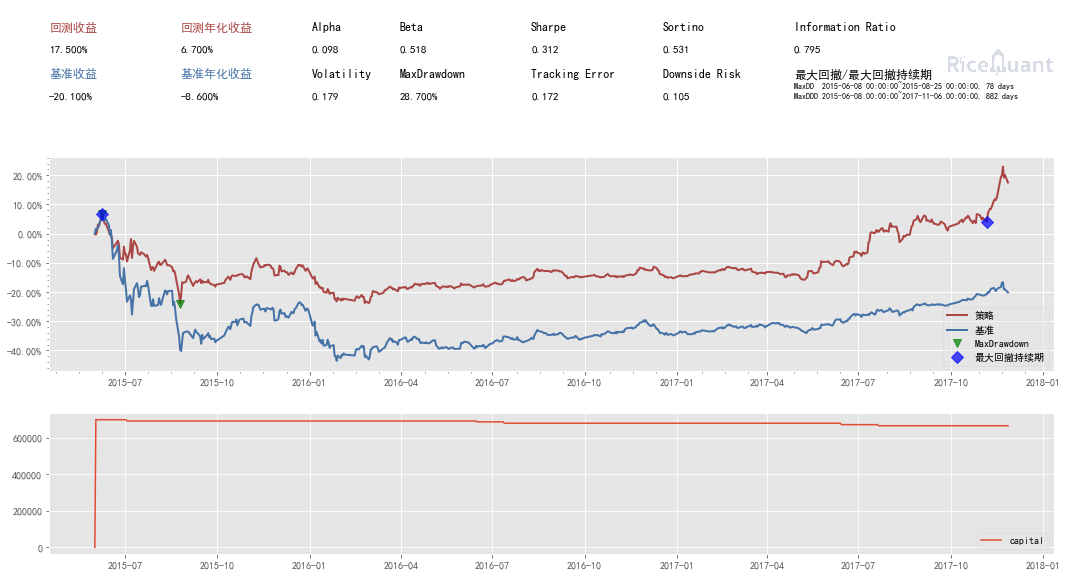

{'sys_analyser': {'benchmark_portfolio':                cash  market_value  static_unit_net_value  total_value  \
  date                                                                    
  2015-06-01  5068.72     994931.28                  1.000   1000000.00   
  2015-06-02  5068.72    1011726.52                  1.000   1016795.24   
  2015-06-03  5068.72    1008143.64                  1.017   1013212.36   
  2015-06-04  5068.72    1015558.32                  1.013   1020627.04   
  2015-06-05  5068.72    1025187.80                  1.021   1030256.52   
  2015-06-08  5068.72    1049335.00                  1.030   1054403.72   
  2015-06-09  5068.72    1042222.16                  1.054   1047290.88   
  2015-06-10  5068.72    1040585.56                  1.047   1045654.28   
  2015-06-11  5068.72    1040091.64                  1.046   1045160.36   
  2015-06-12  5068.72    1045683.52                  1.045   1050752.24   
  2015-06-15  5068.72    1023349.32                  1.051   

In [6]:
import rqalpha
from rqalpha.api import *
# import os

def init(context):
    context.s1 = '000001.XSHE'
    context.s2 = '600036.XSHG'

def handle_bar(context, bar_dict):
    record(context, bar_dict)
    if context.s1 not in context.portfolio.positions:
        order_target_percent(context.s1, 0.5)
    if context.s2 not in context.portfolio.positions:
        order_target_percent(context.s2, 0.2)

#记录当前已占用的资金
def record(context, bar_dict):
    pos_s1 = context.portfolio.positions[context.s1].quantity
    pos_s2 = context.portfolio.positions[context.s2].quantity
    price_s1 = context.portfolio.positions[context.s1].avg_price
    price_s2 = context.portfolio.positions[context.s2].avg_price
    capital = pos_s1*price_s1+pos_s2*price_s2
    plot("capital", capital)


config = {
  "base": {
    "start_date": "2015-06-01",
    "end_date": "2017-12-30",
    "accounts": {'stock':1000000},
    "benchmark": "000300.XSHG",
#     "strategy_file_path": os.path.abspath(__file__)
  },
  "extra": {
    "log_level": "error",
  },
  "mod": {
    "sys_analyser": {
#       "report_save_path": '.',
      "enabled": True,
      "plot": True
    }
  }
}
rqalpha.run_func(init=init, handle_bar=handle_bar, config=config)